## Tensorflow 기본 사용법 정리

- Tensor 기본 사용법 : 차원 확장, 브로드캐스트 연산

In [1]:
import tensorflow as tf
import numpy as np

## 변수와 상수
- tf.constant() : 상수 생성
- tf.variable() : 변수 생성

변수 생성의 경우 run() 하기 전에 반드시 초기화 해야함 
- tf.initialize_all_variables()

## placeholder
- 프로그램 실행중 변경되는 값 / 심벌릭 변수
- run 할때 매개변수로 전달

In [ ]:
a = tf.placeholder('float')
b = tf.placeholder('float')

y = tf.multiply(a, b)

with tf.Session() as sess:
    sess.run(y, feed_dict = {a: 3, b: 3})
    print(y)

## Tensorflow 차원
[구조, 랭크, 차원번호]
1. scalar 1차원 (랭크0)
2. vector 2차원 (랭크2)
3. tensor 3차원 + @

## 모델 저장
tf.train.Saver()

## Tensorflow 흐름 (K 군집화 알고리즘)

전체 알고리즘을 먼저 기술하고, 세션을 생성하여 연산을 수행하는 흐름


In [3]:
num_points = 2000
vectors_set = []

for i in range(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([
            np.random.normal(0.0, 0.9),
            np.random.normal(0.0, 0.9)
                           ])
    else:
        vectors_set.append([
            np.random.normal(3.0, 0.5),
            np.random.normal(1.0, 0.5)
        ])

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

D:\Anaconda3\envs\dev-tensorflow\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


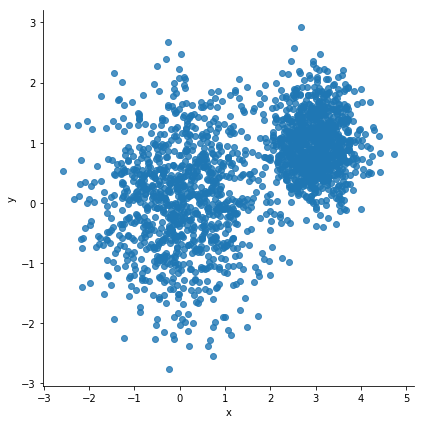

In [5]:
df = pd.DataFrame({
    'x' : [v[0] for v in vectors_set],
    'y' : [v[1] for v in vectors_set]
})
sns.lmplot('x', 'y', data=df, fit_reg=False, size=6)

In [7]:
vectors = tf.constant(vectors_set)
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [k,-1]))

TensorShape([Dimension(2000), Dimension(2)])

In [8]:
vectors.get_shape()

TensorShape([Dimension(2000), Dimension(2)])

In [9]:
centroides.get_shape()

TensorShape([Dimension(4), Dimension(2)])

In [11]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroides, 1)

In [12]:
expanded_vectors.get_shape()

TensorShape([Dimension(1), Dimension(2000), Dimension(2)])

In [13]:
expanded_centroids.get_shape()

TensorShape([Dimension(4), Dimension(1), Dimension(2)])